<a href="https://colab.research.google.com/github/Gial88/skripsi-gial/blob/main/CodeCollab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
#data_dir = '/content/drive/MyDrive/skripsi/data'

In [26]:
data_dir = '/content/drive/MyDrive/skripsi/data/data622'

In [27]:
#pip install split-folders tqdm

In [28]:
#import splitfolders

In [29]:
import tensorflow as tf
import numpy as np
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
import matplotlib

In [30]:
train_dir = data_dir+'/train'
val_dir = data_dir+'/val'
test_dir = data_dir+'/test'
os.listdir(train_dir)

['cataract', 'normal']

In [31]:
class_name = ['cataract','normal']
class_name

['cataract', 'normal']

In [32]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    brightness_range=(0.8,1.2),
                    zoom_range=(0.5,1.0),
                    fill_mode='nearest',
                    )
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [33]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

val_generator = validation_datagen.flow_from_directory(
    val_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

Found 638 images belonging to 2 classes.
Found 212 images belonging to 2 classes.
Found 216 images belonging to 2 classes.


Ukuran gambar : (32, 150, 150, 3)


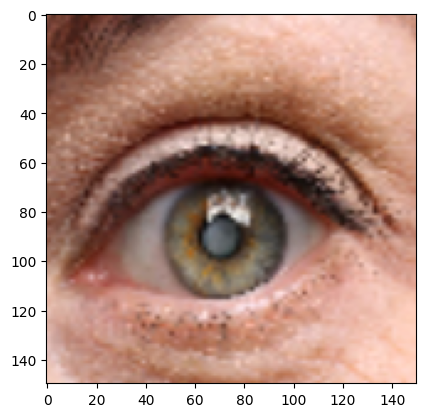

Ukuran gambar : (32, 150, 150, 3)


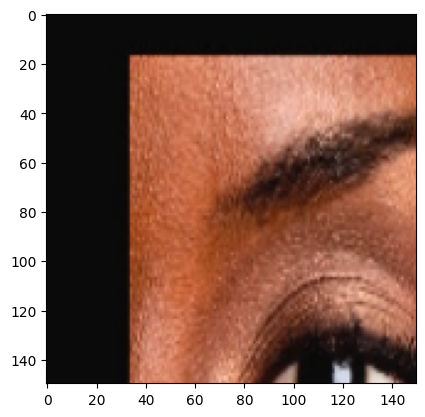

Ukuran gambar : (32, 150, 150, 3)


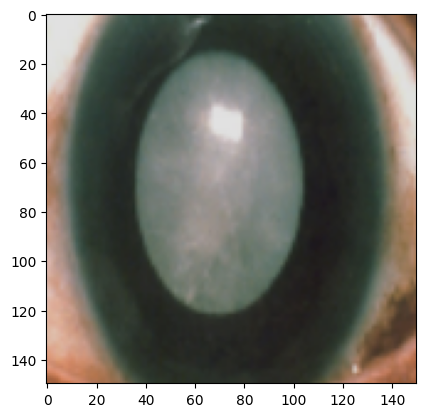

Ukuran gambar : (32, 150, 150, 3)


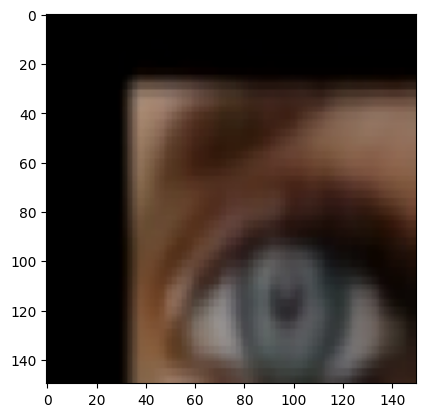

In [34]:
for i in range(4):
  img, label = train_generator.next() # method mengembalikkan data
  print("Ukuran gambar :",img.shape)
  plt.imshow(img[i])
  plt.show()

In [35]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3), activation='relu', input_shape=[150, 150, 3]),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])


In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 17, 17, 128)      

In [37]:
model.compile(
optimizer='adam',
loss='binary_crossentropy',
metrics=['accuracy']
)

In [38]:
hasil = model.fit(train_generator, epochs=20, validation_data=val_generator)

Epoch 1/20
20/20 [==============================] - 148s 8s/step - loss: 0.6996 - accuracy: 0.5298 - val_loss: 0.6737 - val_accuracy: 0.5330
Epoch 2/20
20/20 [==============================] - 18s 921ms/step - loss: 0.5740 - accuracy: 0.7147 - val_loss: 0.5300 - val_accuracy: 0.7264
Epoch 3/20
20/20 [==============================] - 18s 920ms/step - loss: 0.5101 - accuracy: 0.7571 - val_loss: 0.4850 - val_accuracy: 0.7642
Epoch 4/20
20/20 [==============================] - 18s 912ms/step - loss: 0.4667 - accuracy: 0.7806 - val_loss: 0.4153 - val_accuracy: 0.8019
Epoch 5/20
20/20 [==============================] - 18s 914ms/step - loss: 0.4410 - accuracy: 0.7978 - val_loss: 0.4642 - val_accuracy: 0.7783
Epoch 6/20
20/20 [==============================] - 18s 915ms/step - loss: 0.3852 - accuracy: 0.8150 - val_loss: 0.3809 - val_accuracy: 0.7972
Epoch 7/20
20/20 [==============================] - 18s 924ms/step - loss: 0.3590 - accuracy: 0.8182 - val_loss: 0.3526 - val_accuracy: 0.8255
E

In [39]:
model.save("Model811")

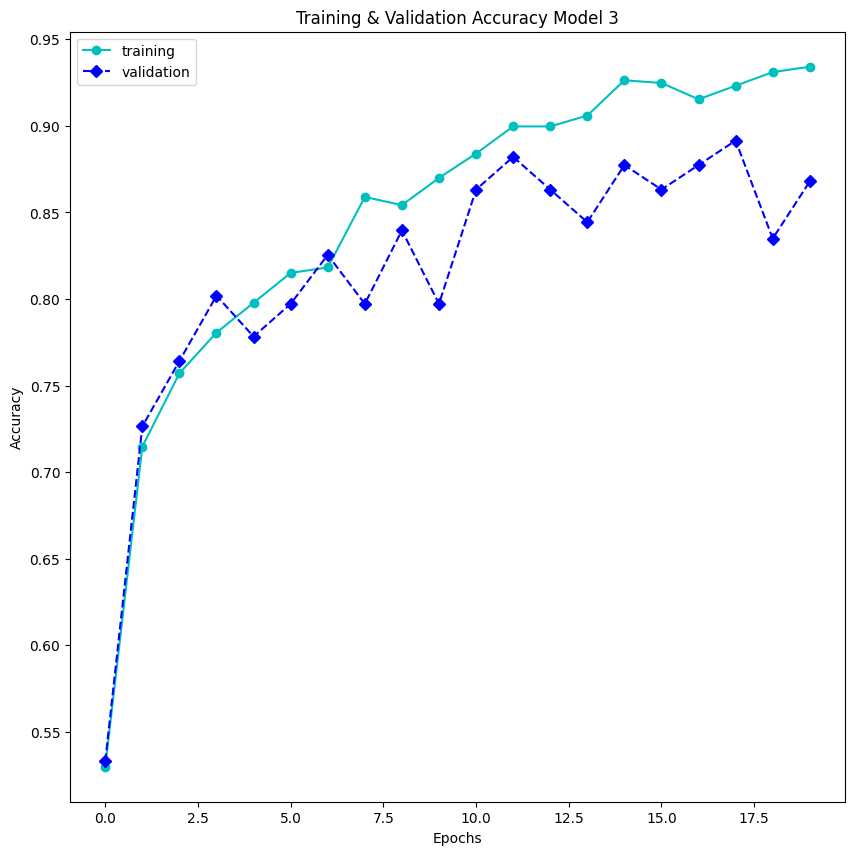

In [40]:
plt.figure(1, figsize=(10,10))
plt.plot(range(len(hasil.history['accuracy'])), hasil.history['accuracy'], 'co-',label='training')
plt.plot(range(len(hasil.history['val_accuracy'])), hasil.history['val_accuracy'], 'bD--', label='validation')
plt.title('Training & Validation Accuracy Model 3')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [41]:
test_evaluate = model.evaluate(test_generator)

print(f'Test loss     : {test_evaluate[0]}')
print(f'Test accuracy : {round(test_evaluate[1],2)}')

7/7 [==============================] - 49s 8s/step - loss: 0.3971 - accuracy: 0.8194
Test loss     : 0.3970735967159271
Test accuracy : 0.82


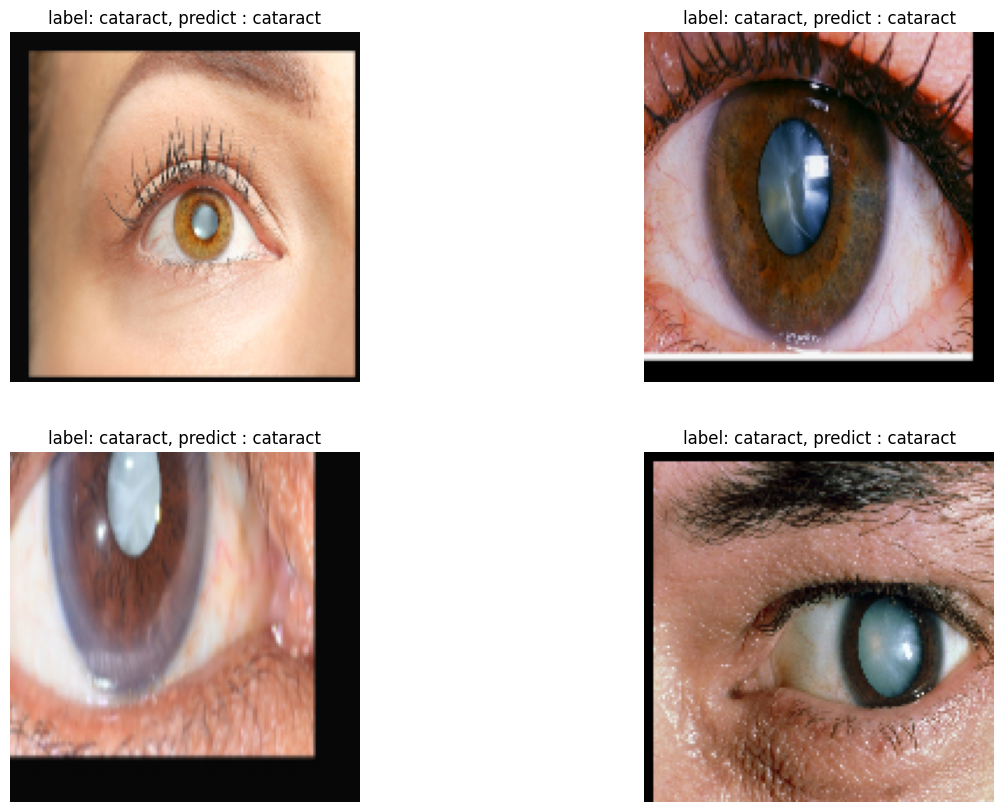

In [42]:
 image ,label = next(iter(test_generator))

plt.figure(figsize=(15,10))
for i in range(4) :
    TrueLabel = class_name[np.argmax(label[i])]
    plt.subplot(2,2,i+1)
    plt.axis('off')
    y_pred = np.argmax(model.predict(image[i][None,...],verbose=0))
    plt.imshow(tf.squeeze(image[i]))
    plt.title(f'label: {TrueLabel}, predict : {class_name[y_pred]}')

In [43]:
y_test = test_generator.classes
y_pred = model.predict(test_generator)

7/7 [==============================] - 5s 708ms/step


In [44]:
y_pred = (y_pred > 0.5).astype(int).ravel()

In [45]:
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0])

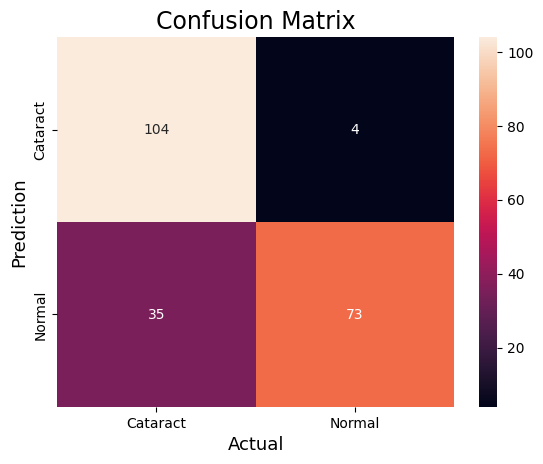

In [46]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Cataract','Normal'],
            yticklabels=['Cataract','Normal'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

plt.show()

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.96      0.84       108
           1       0.95      0.68      0.79       108

    accuracy                           0.82       216
   macro avg       0.85      0.82      0.82       216
weighted avg       0.85      0.82      0.82       216

